## 1. Importar bibliotecas

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Importar Dataset

In [0]:
url = 'https://raw.githubusercontent.com/gabrielzanlorenssi/presidential_approval/master/aprovacao.csv'

dataset = pd.read_csv(url, sep=';')

data = dataset.loc[:,['year', 'month', 'day']]
dataset['date'] = pd.to_datetime(data)

dataset = dataset.sort_values(by='date', ascending=True)

#dataset -> Mostra todo o Dataset
#dataset.presidente.unique() -> Mostra valores únicos da coluna presidente, ou seja, os presidentes contemplados


## 3. Gerar subdatasets

(Essa parte é opcional, como visto posteriormente)

In [0]:
#Porção do Dataset sobre o Sarney 
dataset_sarney = dataset.loc[dataset['presidente'] == 'SARNEY']

#Porção do Dataset sobre o Collor
dataset_collor = dataset.loc[dataset['presidente'] == 'COLLOR']

#Porção do Dataset sobre o Itamar
dataset_itamar = dataset.loc[dataset['presidente'] == 'ITAMAR']

#Porção do Dataset sobre o FHC 
dataset_fhc = dataset.loc[dataset['presidente'] == 'FHC']

#Porção do Dataset sobre o Lula 
dataset_lula = dataset.loc[dataset['presidente'] == 'LULA']

#Porção do Dataset sobre a Dilma 
dataset_dilma = dataset.loc[dataset['presidente'] == 'DILMA']

#Porção do Dataset sobre o Temer 
dataset_temer = dataset.loc[dataset['presidente'] == 'TEMER']


## 4. Avaliação gos Governos ao longo da Redemocratização

###  4.1 Governo Bom ou Ótimo

Aqui é mostrado a evolução da % de pessoas entrevistada que classificavam o respectivo governo como "Bom ou Ótimo"

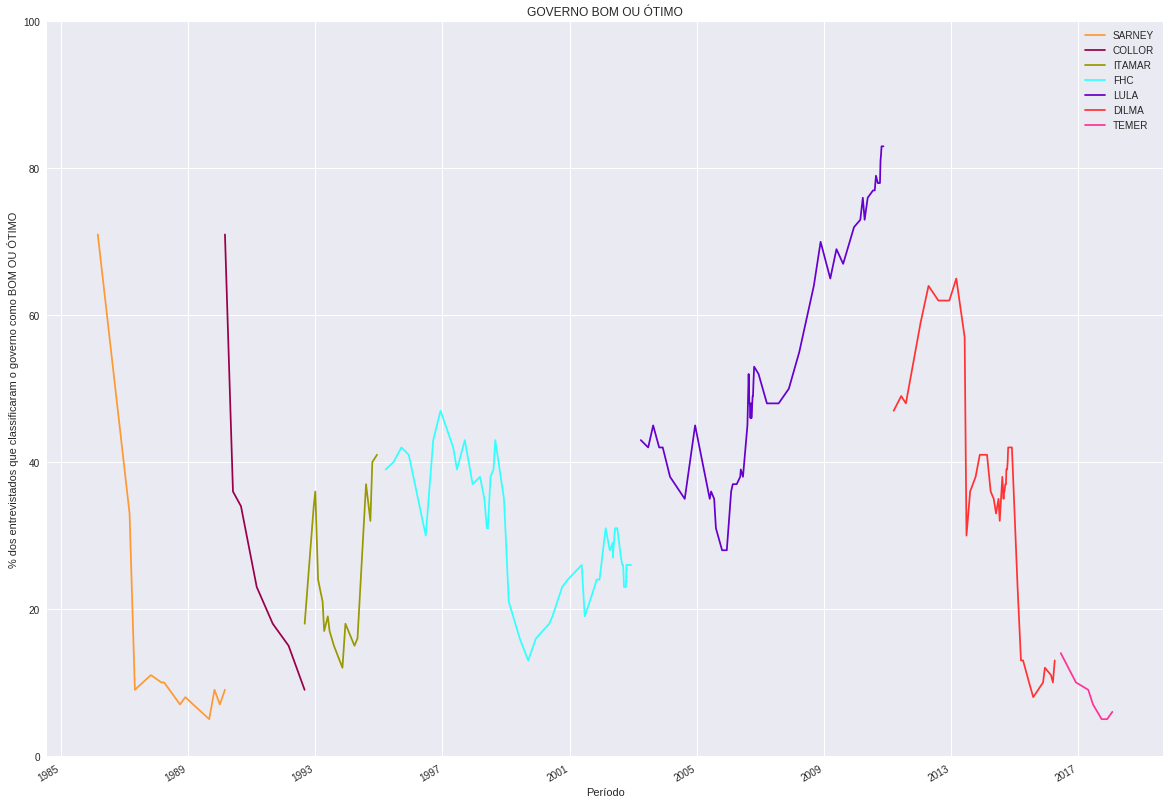

In [4]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111)

plt.title('GOVERNO BOM OU ÓTIMO')

ax.set_ylim(ymin=0, ymax=100)


dataset_sarney.plot(x='date', y='otimo_bom', color=(['#FF9933']), ax = ax)
dataset_collor.plot(x='date', y='otimo_bom', color=(['#99004C']), ax = ax)
dataset_itamar.plot(x='date', y='otimo_bom', color=(['#999900']), ax = ax)
dataset_fhc.plot(x='date', y='otimo_bom', color=(['#33FFFF']), ax = ax)
dataset_lula.plot(x='date', y='otimo_bom', color=(['#6600CC']), ax = ax)
dataset_dilma.plot(x='date', y='otimo_bom', color=(['#FF3333']), ax = ax)
dataset_temer.plot(x='date', y='otimo_bom', color=(['#FF3399']), ax = ax)

ax.legend(["SARNEY", "COLLOR", "ITAMAR", "FHC", "LULA","DILMA", "TEMER"]);
ax.set_ylabel("% dos entrevistados que classificaram o governo como BOM OU ÓTIMO") 
_ = ax.set_xlabel("Período") 

### 4.2 Governo Regular

Aqui é mostrado a evolução da % de pessoas entrevistada que classificavam o respectivo governo como "Regular"

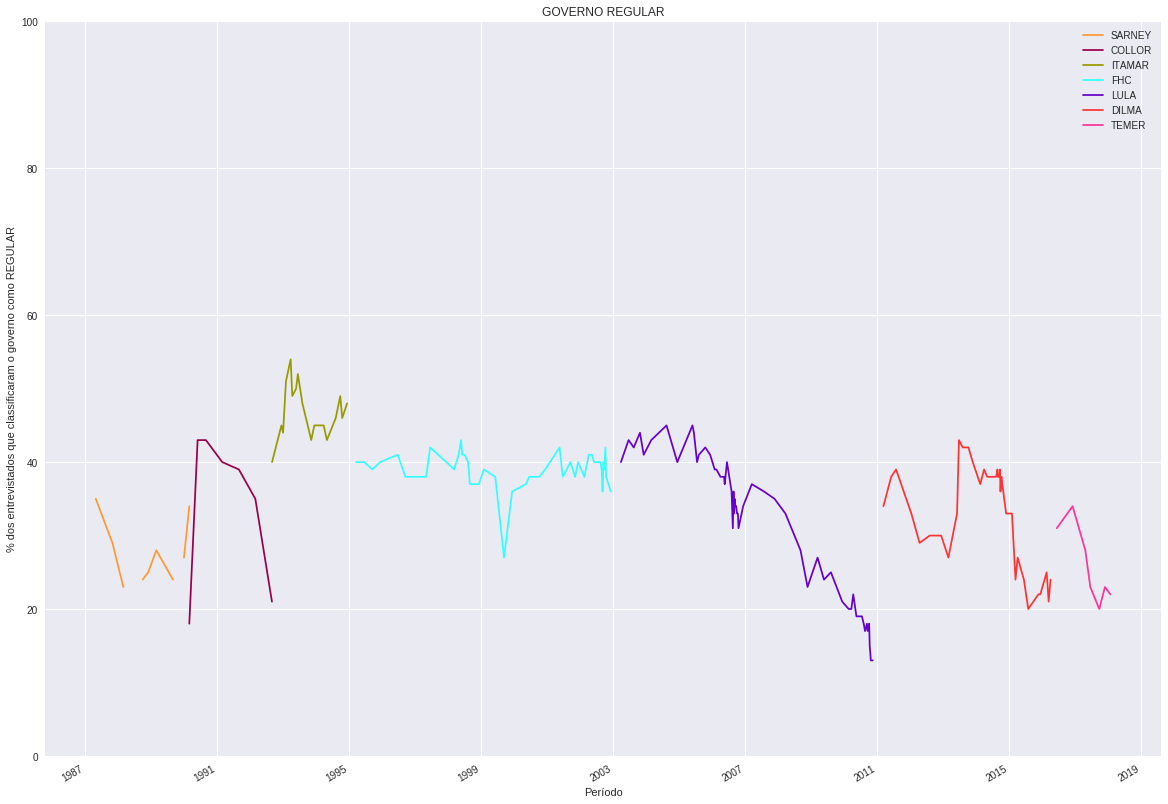

In [5]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111)
ax.set_ylim(ymin=0, ymax=100)
plt.title('GOVERNO REGULAR')

dataset_sarney.plot(x='date', y='regular', color=(['#FF9933']), ax = ax)
dataset_collor.plot(x='date', y='regular', color=(['#99004C']), ax = ax)
dataset_itamar.plot(x='date', y='regular', color=(['#999900']), ax = ax)
dataset_fhc.plot(x='date', y='regular', color=(['#33FFFF']), ax = ax)
dataset_lula.plot(x='date', y='regular', color=(['#6600CC']), ax = ax)
dataset_dilma.plot(x='date', y='regular', color=(['#FF3333']), ax = ax)
dataset_temer.plot(x='date', y='regular', color=(['#FF3399']), ax = ax)

ax.legend(["SARNEY", "COLLOR", "ITAMAR", "FHC", "LULA","DILMA", "TEMER"]);
ax.set_ylabel("% dos entrevistados que classificaram o governo como REGULAR") 
_ = ax.set_xlabel("Período") 



### 4.3 Governo Ruim ou Péssimo

Aqui é mostrada a evolução da % de pessoas entrevistadas que classificavam o respectivo governo como "Ruim ou Péssimo"

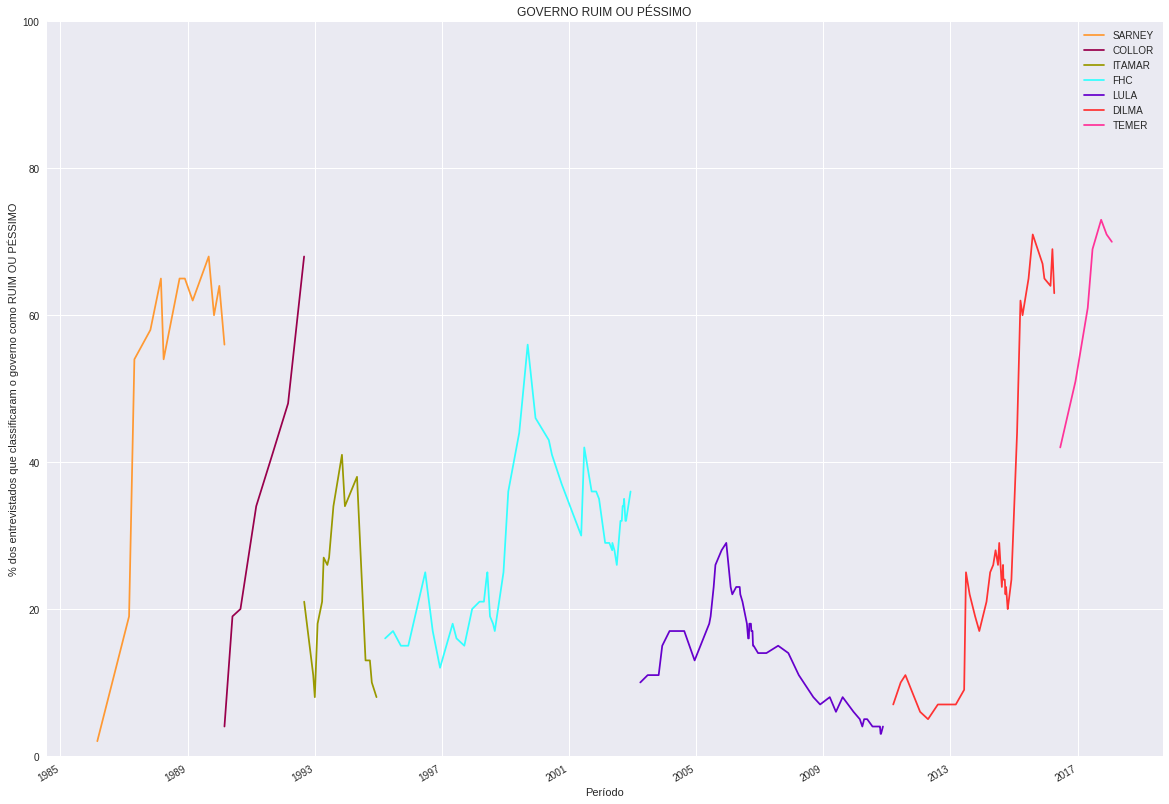

In [6]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111)

ax.set_ylim(ymin=0, ymax=100)
plt.title('GOVERNO RUIM OU PÉSSIMO')

dataset_sarney.plot(x='date', y='ruim', color=(['#FF9933']), ax = ax)
dataset_collor.plot(x='date', y='ruim', color=(['#99004C']), ax = ax)
dataset_itamar.plot(x='date', y='ruim', color=(['#999900']), ax = ax)
dataset_fhc.plot(x='date', y='ruim', color=(['#33FFFF']), ax = ax)
dataset_lula.plot(x='date', y='ruim', color=(['#6600CC']), ax = ax)
dataset_dilma.plot(x='date', y='ruim', color=(['#FF3333']), ax = ax)
dataset_temer.plot(x='date', y='ruim', color=(['#FF3399']), ax = ax)

ax.legend(["SARNEY", "COLLOR", "ITAMAR", "FHC", "LULA","DILMA", "TEMER"]);
ax.set_ylabel("% dos entrevistados que classificaram o governo como RUIM OU PÉSSIMO") 
_ = ax.set_xlabel("Período") 



## 5.Avaliação geral dos governos

#### Para esta análise foi definida a seguinte fórmula:

Saldo = {Bom ou Ótimo} + ({Regular} * 0) - {Ruim ou Péssimo}


In [0]:
#Todos os dados NaN são trocados por 0, que é um elemento neutro para a fórmula
dataset = dataset.fillna(0)
dataset['saldo'] = dataset['otimo_bom'] + (dataset['regular'] * 0) - dataset['ruim']



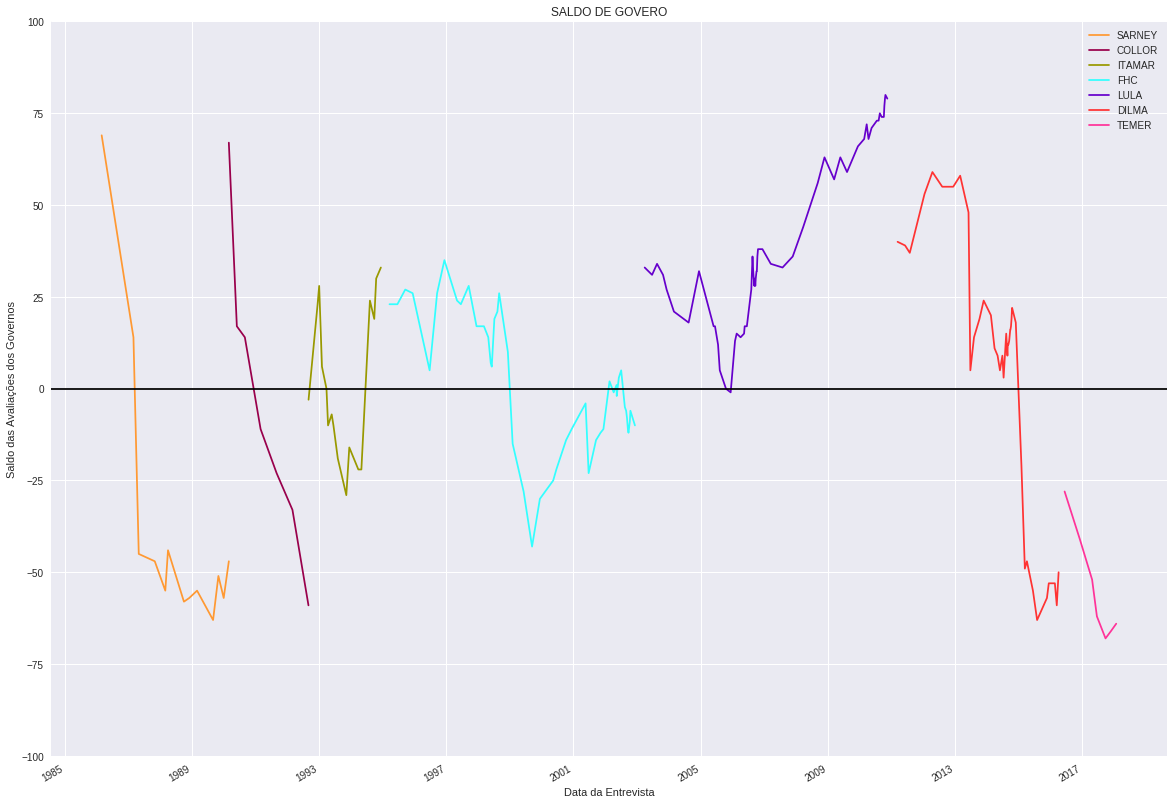

In [8]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111)
ax.set_ylim(ymin=-100, ymax=100)
plt.title('SALDO DE GOVERO')


#Outra forma de abordar o dataset sem gerar subdatasets para cada presidente
dataset[dataset['presidente'] == 'SARNEY'].plot(x='date', y='saldo', color=(['#FF9933']), ax = ax)
dataset[dataset['presidente'] == 'COLLOR'].plot(x='date', y='saldo', color=(['#99004C']), ax = ax)
dataset[dataset['presidente'] == 'ITAMAR'].plot(x='date', y='saldo', color=(['#999900']), ax = ax)
dataset[dataset['presidente'] == 'FHC'].plot(x='date', y='saldo', color=(['#33FFFF']), ax = ax)
dataset[dataset['presidente'] == 'LULA'].plot(x='date', y='saldo', color=(['#6600CC']), ax = ax)
dataset[dataset['presidente'] == 'DILMA'].plot(x='date', y='saldo', color=(['#FF3333']), ax = ax)
dataset[dataset['presidente'] == 'TEMER'].plot(x='date', y='saldo', color=(['#FF3399']), ax = ax)

#Outra forma de gerar as legendas - agora dinamicamente
ax.legend(dataset.presidente.unique());

ax.set_ylabel("Saldo das Avaliações dos Governos") 
_ = ax.set_xlabel("Data da Entrevista") 


#Add line in 0
_ = ax.axhline(y=0, color='k')